# Sprint 深層学習スクラッチ　ニューラルネットワーク

 ### データセット

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
#print(X_train[0])

In [3]:
print(y_train[0])

5


### インポート

In [4]:
import matplotlib.pyplot as plt

#### 可視化

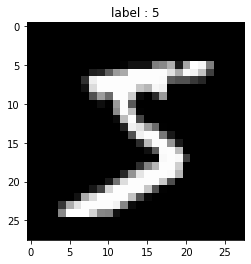

In [5]:
%matplotlib inline
index = 0
image = X_train[0].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

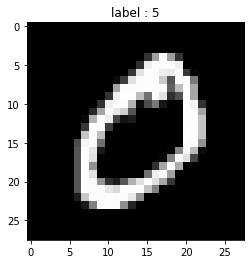

In [16]:
%matplotlib inline
index = 0
image = X_train[1].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

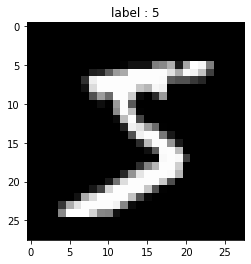

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [13]:
index = 0
image = X_train[0].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) 

### インポート

In [10]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import numpy as np

### 前処理

In [9]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [10]:
#念の為変数名を変更
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [11]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


### ミニバッチ

In [13]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [15]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

#print(len(get_mini_batch)) # 2400
#print(get_mini_batch[6]) 

## 【問題1】重みの初期値を決めるコードの作成

In [46]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

## 【問題2】フォワードプロパゲーションの実装

### 計算の流れ

In [64]:
print(get_mini_batch[6][0]) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
xx = get_mini_batch[6][0]

In [66]:
xxx = get_mini_batch[6]

1層目  

X : 特徴量ベクトル (batch_size, n_features) →(20,784)

W1: 1層目の重み (n_features, n_nodes1)　→(784,400)

B1: 1層目のバイアス (n_nodes1,) →(400,)

A1: 出力 (batch_size, n_nodes1) →(20,400)

In [55]:
#1層目の重みとバイアス作成
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差

W1 = sigma * np.random.randn(n_features, n_nodes1)
B1 =  sigma * np.random.randn(n_nodes1,)

In [70]:
#1層目の一次関数の計算
x_1_k = np.dot(get_mini_batch[6][0],W1)+B1
#(20,400)

In [71]:
#1層目の活性化関数　ハイパポリックタンジェント関数で
x_1_h =np.tanh(x_1_k)
#(20,400)

2層目  

Z1 出力 (batch_size, n_nodes1) → (20,400)

W2: 2層目の重み (n_nodes1, n_nodes2) →(400,200)

B2: 2層目のバイアス (n_nodes2,) →(200,)

A2: 出力 (batch_size, n_nodes2) →(20,200)

In [74]:
#2層目の重みとバイアス作成
n_nodes2 = 200
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
B2 =  sigma * np.random.randn(n_nodes2,)

In [75]:
#2層目の一次関数
x_2_k = np.dot(x_1_h,W2)+B2
#(20,200)

In [76]:
#2層目の活性化関数　ハイパポリックタンジェント関数で
x_2_h =np.tanh(x_2_k)
#(20,200)

3層目  

W3: 3層目の重み (n_nodes2, n_output) →(20,10)

B3: 3層目のバイアス (n_output,) →(10,)

A3: 出力 (batch_size, n_output) →(20,10)

Z3出力 (batch_size, n_output) → (20,10)

Z3 は各ラベル（0〜9）に対する確率の配列である。

In [77]:
#3層目の重みとバイアス作成
n_output = 10
W3 = sigma * np.random.randn(n_nodes2, n_output)
B3 =  sigma * np.random.randn(n_output,)

In [78]:
#3層目の一次関数
x_3_k = np.dot(x_2_k,W3)+B3
#(20,10)

In [130]:
print(sum(x_3_k))

[ 0.10431231  0.37155489 -0.00936853 -0.07258711  0.02297094  0.1211413
 -0.00542453  0.52240477 -0.21663972  0.12684287]


In [160]:
print(np.sum(np.exp(x_3_k),axis=1))

[10.05101109 10.04335151 10.05356184 10.04881747 10.04348482 10.05665696
 10.04085914 10.05580735 10.05770566 10.0456764  10.04727047 10.04451966
 10.05081791 10.05219628 10.06296394 10.04504005 10.04997155 10.0473981
 10.04568993 10.03561789]


In [141]:
#20サンプルの分子作成
bunbo = np.sum(np.exp(x_3_k),axis=1)

In [146]:
#20サンプル、10クラスと割り算できるようにリシェーぷ
bunboT = np.reshape(bunbo,[20,1]) 

In [148]:
#わりざん
soft = np.exp(x_3_k)/bunboT

In [140]:
1.00801661/10.05101109

0.10029007041917413

In [157]:
#print(np.exp(x_3_k))

In [102]:
aaa = np.exp(x_3_k)

In [128]:
#print(aaa)

In [125]:
print(np.sum(np.exp(aaa)))

546.3525700096318


In [103]:
bbb = aaa/sum(aaa)

In [123]:
ss = np.sum(np.exp(x_3_k[0]))

In [124]:
print(ss)

10.051011092105199


In [109]:
#print(bbb)

In [156]:
#3層目のソフトマックスアウトプット 　手計算してみる
#10クラス分計算

#0番目のサンプルのクラス0
z_3_0 = np.exp(x_3_k[0,0])/np.sum(np.exp(x_3_k[0]))
print(z_3_0)

#0番目のサンプルのクラス1
z_3_1 = np.exp(x_3_k[0,1])/np.sum(np.exp(x_3_k[0]))
print(z_3_1)

#0番目のサンプルのクラス2
z_3_2 = np.exp(x_3_k[0,2])/np.sum(np.exp(x_3_k[0]))
print(z_3_2)

#0番目のサンプルのクラス3
z_3_3 = np.exp(x_3_k[0,3])/np.sum(np.exp(x_3_k[0]))
print(z_3_3)

#0番目のサンプルのクラス4
z_3_4 = np.exp(x_3_k[0,4])/np.sum(np.exp(x_3_k[0]))
print(z_3_4)

#0番目のサンプルのクラス5
z_3_5 = np.exp(x_3_k[0,5])/np.sum(np.exp(x_3_k[0]))
print(z_3_5)

#0番目のサンプルのクラス6
z_3_6 = np.exp(x_3_k[0,6])/np.sum(np.exp(x_3_k[0]))
print(z_3_6)

#0番目のサンプルのクラス7
z_3_7 = np.exp(x_3_k[0,7])/np.sum(np.exp(x_3_k[0]))
print(z_3_7)

#0番目のサンプルのクラス8
z_3_8 = np.exp(x_3_k[0,8])/np.sum(np.exp(x_3_k[0]))
print(z_3_8)

#0番目のサンプルのクラス9
z_3_9 = np.exp(x_3_k[0,9])/np.sum(np.exp(x_3_k[0]))
print(z_3_9)

0.10029006990824695
0.10145088085936989
0.09979313697749465
0.09884243708463092
0.09947079903281272
0.10012640417296462
0.09938001276910127
0.10185332713015385
0.09842671994610942
0.10036621211911576


In [154]:
y_get_0 = get_mini_batch[0][1]

In [166]:
#引き算
#y_get_0-soft

In [179]:
#print(y_train)

In [ ]:
-np.sum(t*np.log(y))/batchsaiz

In [97]:
z_3 = z_3_0+z_3_1+z_3_2+z_3_3+z_3_4+z_3_5+z_3_6+z_3_7+z_3_8+z_3_9
print(z_3)
#合わせて1になった

1.0


In [101]:
#上記を20サンプル分合わせる
Z3 = np.array([z_3_0,z_3_1,z_3_2,z_3_3,z_3_4,z_3_5,z_3_6,z_3_7,z_3_8,z_3_9])
print(Z3)


[0.10029007 0.10145088 0.09979314 0.09884244 0.0994708  0.1001264
 0.09938001 0.10185333 0.09842672 0.10036621]


In [178]:
#手計算したものと合致した
print(soft[0])

[0.10029007 0.10145088 0.09979314 0.09884244 0.0994708  0.1001264
 0.09938001 0.10185333 0.09842672 0.10036621]


### 関数化

In [219]:
B1 =  sigma * np.random.randn(n_nodes1,)
B2 =  sigma * np.random.randn(n_nodes2,)
B3 =  sigma * np.random.randn(n_output,)

In [185]:
#関数化
def forward(X):
    #一層目の変数作成
    n_features = 784
    n_nodes1 = 400
    sigma = 0.01 # ガウス分布の標準偏差
    W1 = sigma * np.random.randn(n_features, n_nodes1)
    B1 =  sigma * np.random.randn(n_nodes1,)
    
    #1層目の一次関数の計算
    A1 = np.dot(X,W1)+B1
    #(20,400)
    #1層目の活性化関数　ハイパポリックタンジェント関数で
    Z1 =np.tanh(A1)
    #(20,400)
    
    #2層目の重みとバイアス作成
    n_nodes2 = 200
    W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
    B2 =  sigma * np.random.randn(n_nodes2,)
    
    #2層目の一次関数
    A2 = np.dot(x_1_h,W2)+B2
    #(20,200)
    
    #2層目の活性化関数　ハイパポリックタンジェント関数で
    Z2 =np.tanh(A2)
    #(20,200)
    
    #3層目の重みとバイアス作成
    n_output = 10
    W3 = sigma * np.random.randn(n_nodes2, n_output)
    B3 =  sigma * np.random.randn(n_output,)
    
    #3層目の一次関数
    A3 = np.dot(x_2_k,W3)+B3
    #(20,10)
    
    batchi_sumple = 20
    #20サンプルのソフトマックス分子作成
    bunbo = np.sum(np.exp(A3),axis=1)
    #20サンプル、10クラスと割り算できるようにリシェーぷ
    bunboT = np.reshape(bunbo,[batchi_sumple,1])
    #ソフトマックス計算
    Z3 = np.exp(A3)/bunboT
    
    return Z3,W3,Z2,A2,W2,Z1,A1,W1

In [186]:
Z3,W3,Z2,A2,W2,Z1,A1,W1 = forward(get_mini_batch[6][0])

In [165]:
#print(Z)

In [168]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

In [171]:
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    forward(get_mini_batch)
    pass

## 【問題3】交差エントロピー誤差の実装

In [177]:
#とりあえず計算
-np.sum(Z_y6*np.log(Z))/n_output

4.612628397726519

In [202]:
#print(get_mini_batch[6][1])

In [175]:
Z_y6 = get_mini_batch[6][1]

## 【問題4】バックプロパゲーションの実装

**備忘：それぞれの勾配を計算して、勾配に学習率αを掛けたものを、元の重みとバイアスからひく**

### 計算の流れ

#### 3層目

In [107]:
#A3の勾配 →Z3-Y
print(y_train[6])
y6 = get_mini_batch[6][1]
#A3_new = Z3-y6 #(20,10)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [222]:
#B3 → A3_new のJ番目のサンプルをバッチサイズ分sum  =  A3_new
#(20,10) →＃(10,)
B3_new = np.sum(A3_new,axis = 0)

In [189]:
#W3 → Z2のT dot A3_new
#(200,10)
W3_new = np.dot(Z2.T,A3_new)

In [191]:
#Z2 →A3new dot W3.T
#(20,200)
Z2_new = np.dot(A3_new,W3.T)

#### 2層目

In [193]:
#A2 →Z2 アマダーる（1-tan2(A2))
#(20,200)
A2_new = Z2_new*(1-np.tanh(A2)**2)

In [223]:
#B2 → A2_new のJ番目のサンプルをバッチサイズ分sum  =  A2_new
#(20,200) →200
B2_new = np.sum(A2_new,axis = 0)

In [195]:
#W2 → Z1.T dot A2_new
# (400,200)
W2_new = np.dot(Z1.T,A2_new)

In [196]:
#Z1 = A2_new dot W2.T
# (20,400)
Z1_new = np.dot(A2_new,W2.T)

#### 1層目

In [198]:
#A1 = Z1 アダマール (1-tan(A1)**2)
#(20,400)
A1_new  = Z1_new**(1-np.tanh(A1)**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
#B1 =  A1_new のJ番目のサンプルをバッチサイズ分sum  =  A1_new
#(20,400)
B1_new = np.sum(A1_new,axis = 0)

In [33]:
#W1 = X.T dot A1_new
#(784,400)
X6 = get_mini_batch[6][0]
#W1_new = np.dot(X6.T,A1_new)

In [203]:
#バイアス更新
α = 0.0001
W3 -= α*W3_new

In [206]:
#print(W3)

### 関数化

In [225]:
def backpro(X,y,α,Z3,W3,Z2,A2,W2,Z1,A1,W1,B3,B2,B1):
    #3層目
    A3_new = Z3-y    
    B3_new = np.sum(A3_new,axis = 0)
    W3_new = np.dot(Z2.T,A3_new)
    Z2_new = np.dot(A3_new,W3.T)
    #2層目
    A2_new = Z2_new*(1-np.tanh(A2)**2)
    B2_new = np.sum(A2_new,axis = 0)
    W2_new = np.dot(Z1.T,A2_new)
    Z1_new = np.dot(A2_new,W2.T)
    #1層目
    A1_new  = Z1_new**(1-np.tanh(A1)**2)
    B1_new = np.sum(A1_new,axis = 0)
    W1_new = np.dot(X.T,A1_new)
    
    #バイアス更新
    W3 -= α*W3_new
    B3 -= α*B3_new
    W2 -= α*W2_new
    B2 -= α*B2_new
    W1 -= α*W1_new
    B1 -= α*B1_new
    
    return W3,B3,W2,B2,W1,B1    

## 【問題5】推定

In [228]:
def pred(X):
    Z3,W3,Z2,A2,W2,Z1,A1,W1=forward(X)
    pred = np.argmax(Z3,axis = 1)
    return pred

In [229]:
pred(X6)

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

## 【問題6】学習と推定

### 全て合わせてクラス化

In [144]:
class ScratchSimpleNeuralNetrowkClassifier():
    
    def __init__(self, iter_num = 100,verbose = True,α=0.00001,n_features = 784,n_nodes1 = 400,sigma = 0.01,n_nodes2 = 200,n_output = 10,batchi_sumple=20):
        self.verbose = verbose
        self.α = α
        self.n_features =n_features
        self.n_nodes1 = n_nodes1
        self.sigma = sigma
        self.n_nodes2=n_nodes2
        self.n_output=n_output
        self.batchi_sumple =batchi_sumple
        self.iter_num = iter_num
        
        pass
    
    def _first_set(self):
        #一層目の変数作成
        self.W1= self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.B1 =  np.random.randn(self.n_nodes1,)
        
        #2層目の重みとバイアス作成
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.B2 =  np.random.randn(self.n_nodes2,)
        
        #3層目の重みとバイアス作成
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B3 =  np.random.randn(self.n_output,)
        pass
        
    def _forward(self,X):    
        #1層目の一次関数の計算
        A1 = np.dot(X,self.W1)+self.B1
        #1層目の活性化関数　ハイパポリックタンジェント関数で
        Z1 =np.tanh(A1)

        #2層目の一次関数
        A2 = np.dot(Z1,self.W2)+self.B2
        #2層目の活性化関数　ハイパポリックタンジェント関数で
        Z2 =np.tanh(A2)
        
        #3層目の一次関数
        A3 = np.dot(A2,self.W3)+self.B3
        
        #20サンプルのソフトマックス分子作成
        bunbo = np.sum(np.exp(A3),axis=1)
        #20サンプル、10クラスと割り算できるようにリシェーぷ
        bunboT = np.reshape(bunbo,[X.shape[0],1])
        #ソフトマックス計算でZ3算出
        Z3 = np.exp(A3)/bunboT
        
        return Z3,Z2,A2,Z1,A1
    
    def _backpro(self,X,y,Z3,Z2,A2,Z1,A1):
        #3層目
        A3_new = Z3-y    
        B3_new = np.sum(A3_new,axis = 0)
        W3_new = np.dot(Z2.T,A3_new)
        Z2_new = np.dot(A3_new,self.W3.T)
        #2層目
        A2_new = Z2_new*(1-np.tanh(A2)**2)
        B2_new = np.sum(A2_new,axis = 0)
        W2_new = np.dot(Z1.T,A2_new)
        Z1_new = np.dot(A2_new,self.W2.T)
        #1層目
        A1_new  = Z1_new*(1-np.tanh(A1)**2)
        B1_new = np.sum(A1_new,axis = 0)
        W1_new = np.dot(X.T,A1_new)
        #バイアス更新
        self.W3 -= self.α*W3_new
        self.B3 -= self.α*B3_new
        self.W2 -= self.α*W2_new
        self.B2 -= self.α*B2_new
        self.W1 -= self.α*W1_new
        self.B1 -= self.α*B1_new
        
        pass   
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self._first_set()
        
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batchi_sumple)
        loss_list = []
        
        if self.verbose == True:
            for i in range(self.iter_num):
                for mini_X_train, mini_y_train in get_mini_batch:
                    #verboseをTrueにした際は学習過程などを出力する
                    Z3,Z2,A2,Z1,A1=self._forward(mini_X_train)
                    self._backpro(mini_X_train,mini_y_train,Z3,Z2,A2,Z1,A1)
                loss = -np.sum(mini_y_train*np.log(Z3))/self.n_output
                loss_list.append(loss)
            return loss_list
        else:
            for i in range(self.iter_num):
                for mini_X_train, mini_y_train in get_mini_batch:
                    Z3,Z2,A2,Z1,A1=self._forward(mini_X_train)
                    self._backpro(mini_X_train,mini_y_train,Z3,Z2,A2,Z1,A1)
            pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        Z3,Z2,A2,Z1,A1=self._forward(X)
        pred = np.argmax(Z3,axis = 1)
        
        return pred,Z3

In [145]:
NN =ScratchSimpleNeuralNetrowkClassifier()

In [146]:
loss_list = NN.fit(X_train, y_train)

In [148]:
pred6,Z3 = NN.predict(X6)

In [149]:
print(pred6)

[4 8 6 3 3 7 1 7 7 6 2 2 9 0 9 1 4 1 6 0]


In [123]:
print(y6_pre)
y6_pre = np.argmax(y6,axis = 1)

[4 8 2 3 3 7 1 7 7 6 2 2 9 0 9 1 4 1 6 0]


In [139]:
y_val
y_test = np.argmax(y_val,axis = 1)

In [150]:
pred_val,Z3_val = NN.predict(X_val)
#X_val,, y_val

In [127]:
X_val.shape[0]

12000

In [135]:
from sklearn.metrics import accuracy_score

In [151]:
#アキュラシー算出
print(accuracy_score(y_test, pred_val))

0.86


## 【問題7】学習曲線のプロット

In [124]:
#print(y6)

In [152]:
print(len(loss_list))

100


In [105]:
#print(Z3)

In [153]:
aaaa = np.arange(0,len(loss_list))

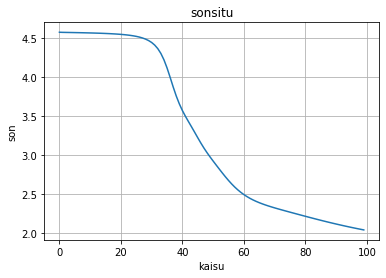

In [154]:
plt.title("sonsitu")
plt.xlabel('kaisu')
plt.ylabel('son')
plt.grid()
plt.plot(aaaa,loss_list)
plt.show()

## 【問題8】（アドバンス課題）誤分類の確認

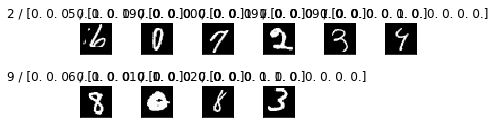

In [156]:
import numpy as np
import matplotlib.pyplot as plt

num = 10 # いくつ表示するか

true_false = y_test==pred_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(pred_val[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

## 色々検証

In [157]:
class ScratchSimpleNeuralNetrowkClassifier_K():
    
    def __init__(self, iter_num = 200,verbose = True,α=0.00001,n_features = 784,n_nodes1 = 400,sigma = 0.01,n_nodes2 = 200,n_output = 10,batchi_sumple=20):
        self.verbose = verbose
        self.α = α
        self.n_features =n_features
        self.n_nodes1 = n_nodes1
        self.sigma = sigma
        self.n_nodes2=n_nodes2
        self.n_output=n_output
        self.batchi_sumple =batchi_sumple
        self.iter_num = iter_num
        
        pass
    
    def _first_set(self):
        #一層目の変数作成
        self.W1= self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.B1 =  np.random.randn(self.n_nodes1,)
        
        #2層目の重みとバイアス作成
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.B2 =  np.random.randn(self.n_nodes2,)
        
        #3層目の重みとバイアス作成
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B3 =  np.random.randn(self.n_output,)
        pass
        
    def _forward(self,X):    
        #1層目の一次関数の計算
        A1 = np.dot(X,self.W1)+self.B1
        #1層目の活性化関数　ハイパポリックタンジェント関数で
        Z1 =np.tanh(A1)

        #2層目の一次関数
        A2 = np.dot(Z1,self.W2)+self.B2
        #2層目の活性化関数　ハイパポリックタンジェント関数で
        Z2 =np.tanh(A2)
        
        #3層目の一次関数
        A3 = np.dot(A2,self.W3)+self.B3
        
        #20サンプルのソフトマックス分子作成
        bunbo = np.sum(np.exp(A3),axis=1)
        #20サンプル、10クラスと割り算できるようにリシェーぷ
        bunboT = np.reshape(bunbo,[X.shape[0],1])
        #ソフトマックス計算でZ3算出
        Z3 = np.exp(A3)/bunboT
        
        return Z3,Z2,A2,Z1,A1
    
    def _backpro(self,X,y,Z3,Z2,A2,Z1,A1):
        #3層目
        A3_new = Z3-y    
        B3_new = np.sum(A3_new,axis = 0)
        W3_new = np.dot(Z2.T,A3_new)
        Z2_new = np.dot(A3_new,self.W3.T)
        #2層目
        A2_new = Z2_new*(1-np.tanh(A2)**2)
        B2_new = np.sum(A2_new,axis = 0)
        W2_new = np.dot(Z1.T,A2_new)
        Z1_new = np.dot(A2_new,self.W2.T)
        #1層目
        A1_new  = Z1_new*(1-np.tanh(A1)**2)
        B1_new = np.sum(A1_new,axis = 0)
        W1_new = np.dot(X.T,A1_new)
        #バイアス更新
        self.W3 -= self.α*W3_new
        self.B3 -= self.α*B3_new
        self.W2 -= self.α*W2_new
        self.B2 -= self.α*B2_new
        self.W1 -= self.α*W1_new
        self.B1 -= self.α*B1_new
        
        pass   
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self._first_set()
        
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batchi_sumple)
        loss_list = []
        
        if self.verbose == True:
            for i in range(self.iter_num):
                for mini_X_train, mini_y_train in get_mini_batch:
                    #verboseをTrueにした際は学習過程などを出力する
                    Z3,Z2,A2,Z1,A1=self._forward(mini_X_train)
                    self._backpro(mini_X_train,mini_y_train,Z3,Z2,A2,Z1,A1)
                loss = -np.sum(mini_y_train*np.log(Z3))/self.n_output
                loss_list.append(loss)
            return loss_list
        else:
            for i in range(self.iter_num):
                for mini_X_train, mini_y_train in get_mini_batch:
                    Z3,Z2,A2,Z1,A1=self._forward(mini_X_train)
                    self._backpro(mini_X_train,mini_y_train,Z3,Z2,A2,Z1,A1)
            pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        Z3,Z2,A2,Z1,A1=self._forward(X)
        pred = np.argmax(Z3,axis = 1)
        
        return pred,Z3

In [ ]:
#200回にしてみる

In [158]:
NN_K =ScratchSimpleNeuralNetrowkClassifier_K()

In [162]:
loss_list_K = NN_K.fit(X_train, y_train)

In [163]:
pred_val_k,Z3_val_k = NN_K.predict(X_val)

In [164]:
#アキュラシー算出
print(accuracy_score(y_test, pred_val_k))
#200回にすると90超えるまで上がったけども、実行時間がかかりすぎなので200までで断念する

0.90125


In [165]:
aaaa_k = np.arange(0,len(loss_list_K))

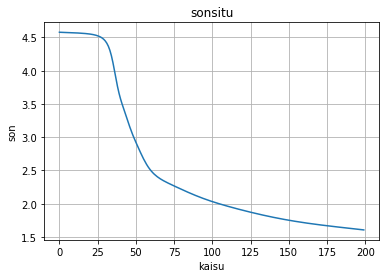

In [166]:
plt.title("sonsitu")
plt.xlabel('kaisu')
plt.ylabel('son')
plt.grid()
plt.plot(aaaa_k,loss_list_K)
plt.show()